In [73]:
import requests
import json

import numpy as np
import os
import time
import sys
import numpy as np

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# from mpltools import annotation

# some default font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

## Untils Defination

In [74]:
cmd_prefix = "./back-end-tests/manyRequest"

In [211]:
def run_command(cmd):
    return os.popen(cmd).read()

def get_run_time(result):
    prefix = "Time Cost:  "
    print(result)
    return float(result[result.index(prefix) + len(prefix):result.index(" ms")])

def get_request_url(pdiameter = 100,
    pdensity = 300,
    velocity = 20,
    theta = 45,
    tdensity = 2500,
    depth = 0,
    distance = 100):
    
    URL = """http://121.36.81.191/cgi-bin/crater.cgi?dist=%d&distanceUnits=1&diam=%d&diameterUnits=1&pdens=%d&pdens_select=0&vel=%d&velocityUnits=1&theta=%d&tdens=%d&wdepth=%d&wdepthUnits=1""" % (distance, pdiameter, pdensity, velocity, theta, tdensity, depth)
    return URL

In [212]:
def record_times_get(times, url, sleep = False):
    """
    paramters:
        times: slice or numpy.ndarray, 
                howMayTimes, request
        url: string
            address of get request
    """
    
    times = np.array(times)
    records = {}
    
    for t in times:
        params = " --url='%s' --requestMethod=get --requestTimes=%d" % (url, t)
        records[t] = get_run_time(run_command(cmd = cmd_prefix + params))
        if sleep:
            time.sleep(1*60)
    return records

def record_time_post(times, url,
                     pdiameter = 100,
                    pdensity = 300,
                    velocity = 20,
                    theta = 45,
                    tdensity = 2500,
                    depth = 0,
                    distance = 100,
                    sleep = False):
    
    """
    paramters:
        times: slice or numpy.ndarray, 
                howMayTimes, request
        url: string
            address of get request
    """
    
    times = np.array(times)
    records = {}
    params_data = " --impactor_density=%d --impactor_diameter=%d --impactor_velocity=%d --impactor_theta=%d --target_density=%d --target_depth=%d --target_distance=%d " % (
    pdensity, pdiameter, velocity, theta, tdensity, depth, distance)
    
    for t in times:
        params = " --url='%s' --requestMethod=post --requestTimes=%d " % (url, t)
        records[t] = get_run_time(run_command(cmd = cmd_prefix + params + params_data))
        if sleep:
            time.sleep(1*60)
        
    return records
    
    

In [115]:
run_command("git pull && cd back-end-tests/ && go build manyRequest.go")

From github.com:acse-dx121/impact-effects-web
   6362a2d..94a8e0a  main       -> origin/main


'Updating 6362a2d..94a8e0a\nFast-forward\n Test/back-end-tests/manyRequest.go | 32 +++++++++++++++-----------------\n 1 file changed, 15 insertions(+), 17 deletions(-)\n'

## Collect Runtime

### Old Web Tool

In [199]:
times = [i for i in range(20, 500, 20)]

In [215]:
records = record_times_get(times, get_request_url(), sleep = True)

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=100&distanceUnits=1&diam=100&diameterUnits=1&pdens=300&pdens_select=0&vel=20&velocityUnits=1&theta=45&tdens=2500&wdepth=0&wdepthUnits=1 
Time Cost:  1610 ms

http://121.36.81.191:50052/simulator
Run request for 40 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=100&distanceUnits=1&diam=100&diameterUnits=1&pdens=300&pdens_select=0&vel=20&velocityUnits=1&theta=45&tdens=2500&wdepth=0&wdepthUnits=1 
Time Cost:  1935 ms

http://121.36.81.191:50052/simulator
Run request for 60 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=100&distanceUnits=1&diam=100&diameterUnits=1&pdens=300&pdens_select=0&vel=20&velocityUnits=1&theta=45&tdens=2500&wdepth=0&wdepthUnits=1 
Time Cost:  2943 ms

http://121.36.81.191:50052/simulator
Run request for 80 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=100&distanceUnits=1&di

### new web tool

In [213]:
records_post = record_time_post(times, "http://121.36.81.191:50052/simulator", sleep = True)

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  197 ms

http://121.36.81.191:50052/simulator
Run request for 40 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  89 ms

http://121.36.81.191:50052/simulator
Run request for 60 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  144 ms

http://121.36.81.191:50052/simulator
Run request for 80 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  189 ms

http://121.36.81.191:50052/simulator
Run request for 100 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  231 ms

http://121.36.81.191:50052/simulator
Run request for 120 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  280 ms

http://121.36.81.191:50052/simulator
Run request for 140 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  365 ms

http://121.36.81.191:5005

In [214]:
records_redis = record_time_post(times, "http://121.36.81.191:50052/simulatorWithRedis", sleep = True)

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  61 ms

http://121.36.81.191:50052/simulator
Run request for 40 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  49 ms

http://121.36.81.191:50052/simulator
Run request for 60 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  33 ms

http://121.36.81.191:50052/simulator
Run request for 80 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  47 ms

http://121.36.81.191:50052/simulator
Run request for 100 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  48 ms

http://121.36.81.191:50052/simulator
Run request for 120 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  99 ms

http://121.36.81.191:50052/simulator
Run request for 140 times to with Redis URL: http://121.36.81.191:50052/simulat

### plot the results

In [216]:
x = list(records.keys())
y = [records[k] for k in x]
print((x,y))

x2 = list(records_post.keys())
y2 = [records_post[k] for k in x]

x3 = list(records_redis.keys())
y3 = [records_redis[k] for k in x]

data_index = [x, x2, x3]
data = [y, y2, y3]


([20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480], [1610.0, 1935.0, 2943.0, 3930.0, 4811.0, 5790.0, 6750.0, 7794.0, 8950.0, 9683.0, 10807.0, 11622.0, 12728.0, 13554.0, 14720.0, 16041.0, 16771.0, 17461.0, 18745.0, 19741.0, 20639.0, 22127.0, 22697.0, 23662.0])


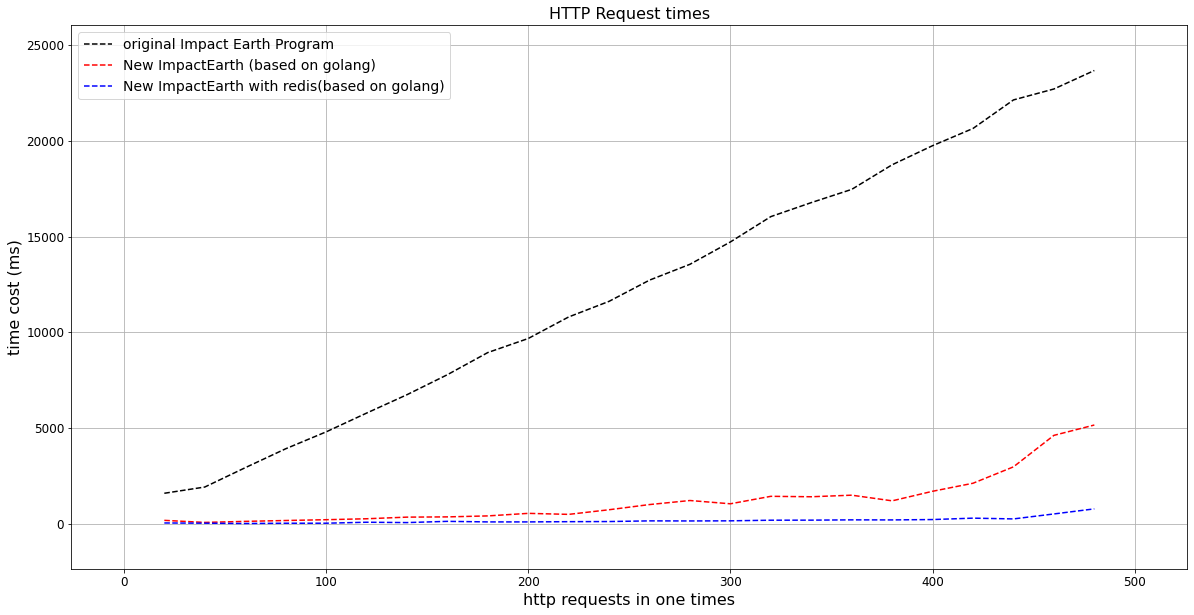

In [217]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
ax1.grid(True)

color = ['k', 'r', 'b', 'g', 'c', 'y']
shape = ['-','.']
labels = ["original Impact Earth Program", "New ImpactEarth (based on golang)", "New ImpactEarth with redis(based on golang)"]

for i in range(len(data)):
    ax1.plot(data_index[i], data[i], '%s%s-'%(color[i%6], shape[0]), 
         label=labels[i])


ax1.set_xlabel('http requests in one times', fontsize=16)
ax1.set_ylabel('time cost (ms)', fontsize=16)
ax1.set_title('HTTP Request times', fontsize=16)
ax1.legend(loc='best', fontsize=14);

plt.savefig("../img/HTTP_Request_Time_new_valid_2.png")

## Test with random Request

In [100]:
import random

In [141]:
times = times = [i for i in range(1, 500, 50)]

In [177]:
def random_float(down, upper):
    return random.random() * (upper - down) + down

def record_times_get_random(times, sleep = False):
    """
    paramters:
        times: slice or numpy.ndarray, 
                howMayTimes, request
        url: string
            address of get request
    """
    
    times = np.array(times)
    records = {}
    
    for t in times:
        density_choice = random.randint(0,2)
        tdensity = 2500
        depth = 0
        
        if density_choice == 0:
            tdensity = 1000
            depth = random.random()*1000 + 1000
        elif density_choice == 1:
            pass
        else:
            tdensity = 2750
            depth = 0
        
        pdiameter = 10 ** random.randint(1, 5)
        scaller = 0.4
        
        url = get_request_url(pdiameter = pdiameter, # m
                        pdensity = random_float(1000, 8000),
                        velocity = random_float(11.2, 72),
                        theta = random_float(10, 80),
                        tdensity = tdensity,
                        depth = depth, 
                        distance = pdiameter * scaller) # scaller = 40 % km
        # print(url)
        params = " --url='%s' --requestMethod=get --requestTimes=%d" % (url, t)
        records[t] = get_run_time(run_command(cmd = cmd_prefix + params))

        if sleep:
            time.sleep(90)

    return records

def record_time_post_random(times, url, sleep = False):
    
    """
    paramters:
        times: slice or numpy.ndarray, 
                howMayTimes, request
        url: string
            address of get request
    """
    
    times = np.array(times)
    records = {}
    
    for t in times:
        density_choice = random.randint(0,2)
        tdensity = 2500
        depth = 0
        
        if density_choice == 0:
            tdensity = 1000
            depth = random.random()*1000 + 1000
        elif density_choice == 1:
            pass
        else:
            tdensity = 2750
            depth = 0
        
        pdiameter = 10 ** random.randint(1, 5)
        scaller = 0.4
        
        pdiameter = pdiameter # m
        pdensity = random_float(1000, 8000)
        velocity = random_float(11.2, 72)
        theta = random_float(10, 80)
        tdensity = tdensity
        depth = depth
        distance = pdiameter * scaller
        
        params_data = " --impactor_density=%d --impactor_diameter=%d --impactor_velocity=%d --impactor_theta=%d --target_density=%d --target_depth=%d --target_distance=%d " % (
        pdensity, pdiameter, velocity, theta, tdensity, depth, distance)
        
        params = " --url='%s' --requestMethod=post --requestTimes=%d " % (url, t)
        records[t] = get_run_time(run_command(cmd = cmd_prefix + params + params_data))

        if sleep:
            time.sleep(90)

        
    return records
    
    

In [179]:
records_random = record_times_get_random(times, sleep = True)

http://121.36.81.191:50052/simulator
Run request for 1 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=40&distanceUnits=1&diam=100&diameterUnits=1&pdens=7083&pdens_select=0&vel=63&velocityUnits=1&theta=36&tdens=2750&wdepth=0&wdepthUnits=1 
Time Cost:  49 ms

http://121.36.81.191:50052/simulator
Run request for 51 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=40000&distanceUnits=1&diam=100000&diameterUnits=1&pdens=2967&pdens_select=0&vel=62&velocityUnits=1&theta=13&tdens=2500&wdepth=0&wdepthUnits=1 
Time Cost:  2566 ms

http://121.36.81.191:50052/simulator
Run request for 101 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=4000&distanceUnits=1&diam=10000&diameterUnits=1&pdens=3924&pdens_select=0&vel=39&velocityUnits=1&theta=66&tdens=2750&wdepth=0&wdepthUnits=1 
Time Cost:  4884 ms

http://121.36.81.191:50052/simulator
Run request for 151 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=40&distanceUn

In [180]:
records_post_random = record_time_post_random(times, "http://121.36.81.191:50052/simulator", sleep = True)

http://121.36.81.191:50052/simulator
Run request for 1 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  7 ms

http://121.36.81.191:50052/simulator
Run request for 51 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  156 ms

http://121.36.81.191:50052/simulator
Run request for 101 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  253 ms

http://121.36.81.191:50052/simulator
Run request for 151 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  498 ms

http://121.36.81.191:50052/simulator
Run request for 201 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  541 ms

http://121.36.81.191:50052/simulator
Run request for 251 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  706 ms

http://121.36.81.191:50052/simulator
Run request for 301 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  966 ms

http://121.36.81.191:5005

In [181]:
records_redis_random = record_time_post_random(times, "http://121.36.81.191:50052/simulatorWithRedis", sleep = True)

http://121.36.81.191:50052/simulator
Run request for 1 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  10 ms

http://121.36.81.191:50052/simulator
Run request for 51 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  96 ms

http://121.36.81.191:50052/simulator
Run request for 101 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  263 ms

http://121.36.81.191:50052/simulator
Run request for 151 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  430 ms

http://121.36.81.191:50052/simulator
Run request for 201 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  533 ms

http://121.36.81.191:50052/simulator
Run request for 251 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  311 ms

http://121.36.81.191:50052/simulator
Run request for 301 times to with Redis URL: http://121.36.81.191:50052/si

In [184]:
records_post_random, records_random, records_redis_random

({1: 7.0,
  51: 156.0,
  101: 253.0,
  151: 498.0,
  201: 541.0,
  251: 706.0,
  301: 966.0,
  351: 975.0,
  401: 2810.0,
  451: 1402.0},
 {1: 49.0,
  51: 2566.0,
  101: 4884.0,
  151: 7263.0,
  201: 9705.0,
  251: 12076.0,
  301: 14484.0,
  351: 17055.0,
  401: 19728.0,
  451: 21660.0},
 {1: 10.0,
  51: 96.0,
  101: 263.0,
  151: 430.0,
  201: 533.0,
  251: 311.0,
  301: 799.0,
  351: 260.0,
  401: 269.0,
  451: 231.0})

([1, 51, 101, 151, 201, 251, 301, 351, 401, 451], [49.0, 2566.0, 4884.0, 7263.0, 9705.0, 12076.0, 14484.0, 17055.0, 19728.0, 21660.0])


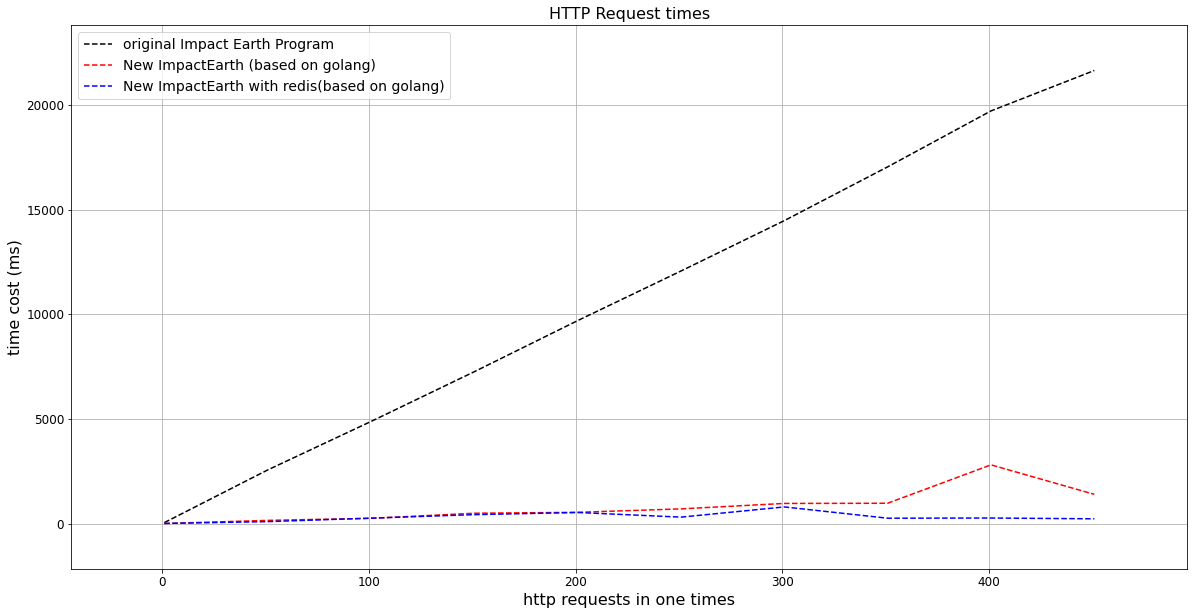

In [185]:
x_random = list(records_random.keys())
y_random = [records_random[k] for k in x_random]
print((x_random,y_random))

x2_random = list(records_post_random.keys())
y2_random = [records_post_random[k] for k in x_random]

x3_random = list(records_redis_random.keys())
y3_random = [records_redis_random[k] for k in x_random]

data_index_random = [x_random, x2_random, x3_random]
data_random = [y_random, y2_random, y3_random]

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
ax1.grid(True)

color = ['k', 'r', 'b', 'g', 'c', 'y']
shape = ['-','.']
labels = ["original Impact Earth Program", "New ImpactEarth (based on golang)", "New ImpactEarth with redis(based on golang)"]

for i in range(len(data_random)):
    ax1.plot(data_index_random[i], data_random[i], '%s%s-'%(color[i%6], shape[0]), 
         label=labels[i])


ax1.set_xlabel('http requests in one times', fontsize=16)
ax1.set_ylabel('time cost (ms)', fontsize=16)
ax1.set_title('HTTP Request times', fontsize=16)
ax1.legend(loc='best', fontsize=14);

plt.savefig("../img/HTTP_Request_Time_random_with_valid_parameter.png")


In [176]:
random.random()*1000 + 1000

1427.0276143838205